# HParam Search Example

In [1]:
%cd ..

/Users/marthygarcia/Documents/GitHub/IFT6759_B_H23


In [2]:
from darts.metrics import mae
from src.pipeline.pipeline import ExperimentPipeline
from darts.models import ExponentialSmoothing
from src.pipeline.experiment import Experiment, HyperParameter, BayesOptHyperParameter
from darts.dataprocessing.transformers import Scaler
from darts.dataprocessing import Pipeline
from darts.utils.utils import ModelMode

ModuleNotFoundError: No module named 'darts'

We first define our dataset and algorithm

In [3]:
# define dataset
dataset = 'traffic'  # ['exchange_rate', 'traffic', 'electricity'], only uses first covariate

In [4]:
# set DARTS model class
model = ExponentialSmoothing

In [5]:
# define preprocessing
preprocessing = Pipeline([
    Scaler()
])

The we define our hyperparameters, which can either be set as `HyperParameters` or sampled from a distribution with `BayesOptHyperparameter`

for more info on which method are available, see documentation [here](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html)

In [6]:
from darts.utils.utils import SeasonalityMode

trend = HyperParameter(
    name='trend',
    value=ModelMode.NONE
)

period = HyperParameter(
    name='seasonal_periods',
    value=24
)

seasonal = BayesOptHyperParameter(
    name='seasonal',
    optuna_suggest_method='suggest_categorical',
    value=dict(choices=[SeasonalityMode.ADDITIVE, SeasonalityMode.MULTIPLICATIVE, SeasonalityMode.NONE])
)

smoothing_level = BayesOptHyperParameter(
    name='smoothing_level',
    optuna_suggest_method='suggest_float',
    value=dict(low=0, high=1)
)

hparams = [trend, period, seasonal, smoothing_level]

Once this is done we can define our experiment

In [7]:
params = Experiment(
    dataset=dataset,
    preprocessing=preprocessing,
    model=model,
    hyper_parameters=hparams,
    metric=mae,
    horizon=24*7,           # Horizon for prediction
    optuna_timeout=60,   # Time allocated for HParam search in seconds
    n_backtest=100,           # Number of validation samples for the backtest, means len(valid_dataset)
    n_train_samples=500     # Number of samples for our .fit(), means len(train_dataset)
)

The we run the experiment and save the logs in our ipynb

In [8]:
# get loads of warnings
import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [9]:
pipeline = ExperimentPipeline(params)
pipeline.run()

Fetching Data ...


[I 2023-03-31 17:46:35,845] A new study created in memory with name: no-name-ad1a2bd9-fb7a-4829-92df-2ddba692fdd2


Beginning Optimization


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:39,551] Trial 0 finished with value: 0.027987663616941546 and parameters: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.8772298910821964}. Best is trial 0 with value: 0.027987663616941546.


Current value: 0.027987663616941546, Current params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.8772298910821964}
Best value: 0.027987663616941546, Best params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.8772298910821964}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:40,667] Trial 1 finished with value: 0.06792628112355305 and parameters: {'seasonal': <SeasonalityMode.NONE: None>, 'smoothing_level': 0.05676421188022307}. Best is trial 0 with value: 0.027987663616941546.


Current value: 0.06792628112355305, Current params: {'seasonal': <SeasonalityMode.NONE: None>, 'smoothing_level': 0.05676421188022307}
Best value: 0.027987663616941546, Best params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.8772298910821964}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:43,614] Trial 2 finished with value: 0.03258261037223224 and parameters: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.546927794572115}. Best is trial 0 with value: 0.027987663616941546.


Current value: 0.03258261037223224, Current params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.546927794572115}
Best value: 0.027987663616941546, Best params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.8772298910821964}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:47,748] Trial 3 finished with value: 0.03307754610081612 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.17127533899267966}. Best is trial 0 with value: 0.027987663616941546.


Current value: 0.03307754610081612, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.17127533899267966}
Best value: 0.027987663616941546, Best params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.8772298910821964}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:48,710] Trial 4 finished with value: 0.032308815540701384 and parameters: {'seasonal': <SeasonalityMode.NONE: None>, 'smoothing_level': 0.9514519896560371}. Best is trial 0 with value: 0.027987663616941546.


Current value: 0.032308815540701384, Current params: {'seasonal': <SeasonalityMode.NONE: None>, 'smoothing_level': 0.9514519896560371}
Best value: 0.027987663616941546, Best params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.8772298910821964}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:52,350] Trial 5 finished with value: 0.020292069137655164 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.020292069137655164, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:55,976] Trial 6 finished with value: 0.020396097793467828 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7864529125218804}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.020396097793467828, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7864529125218804}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:46:56,971] Trial 7 finished with value: 0.03279735502953283 and parameters: {'seasonal': <SeasonalityMode.NONE: None>, 'smoothing_level': 0.9329751436650957}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.03279735502953283, Current params: {'seasonal': <SeasonalityMode.NONE: None>, 'smoothing_level': 0.9329751436650957}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:00,988] Trial 8 finished with value: 0.029369788235478523 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.34823524330674516}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.029369788235478523, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.34823524330674516}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:04,631] Trial 9 finished with value: 0.02359402070246738 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.6099194245339391}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.02359402070246738, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.6099194245339391}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:08,335] Trial 10 finished with value: 0.022686426760704485 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.6453762813418648}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.022686426760704485, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.6453762813418648}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:11,847] Trial 11 finished with value: 0.020306619107677497 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.8021242488761042}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.020306619107677497, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.8021242488761042}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:15,891] Trial 12 finished with value: 0.020466503819859583 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7504128819747057}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.020466503819859583, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7504128819747057}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:20,196] Trial 13 finished with value: 0.020560148402013024 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7671842039313891}. Best is trial 5 with value: 0.020292069137655164.


Current value: 0.020560148402013024, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7671842039313891}
Best value: 0.020292069137655164, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.7898884688052066}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:24,283] Trial 14 finished with value: 0.01853243590078263 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9865616409375795}. Best is trial 14 with value: 0.01853243590078263.


Current value: 0.01853243590078263, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9865616409375795}
Best value: 0.01853243590078263, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9865616409375795}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:28,276] Trial 15 finished with value: 0.0285326246802305 and parameters: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.9925680447213894}. Best is trial 14 with value: 0.01853243590078263.


Current value: 0.0285326246802305, Current params: {'seasonal': <SeasonalityMode.ADDITIVE: 'additive'>, 'smoothing_level': 0.9925680447213894}
Best value: 0.01853243590078263, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9865616409375795}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:32,632] Trial 16 finished with value: 0.018358708258055256 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9958404863116908}. Best is trial 16 with value: 0.018358708258055256.


Current value: 0.018358708258055256, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9958404863116908}
Best value: 0.018358708258055256, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9958404863116908}


  0%|          | 0/101 [00:00<?, ?it/s]

[I 2023-03-31 17:47:36,723] Trial 17 finished with value: 0.018468804192588218 and parameters: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.981666636667883}. Best is trial 16 with value: 0.018358708258055256.


Current value: 0.018468804192588218, Current params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.981666636667883}
Best value: 0.018358708258055256, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9958404863116908}
Best value: 0.018358708258055256, Best params: {'seasonal': <SeasonalityMode.MULTIPLICATIVE: 'multiplicative'>, 'smoothing_level': 0.9958404863116908}


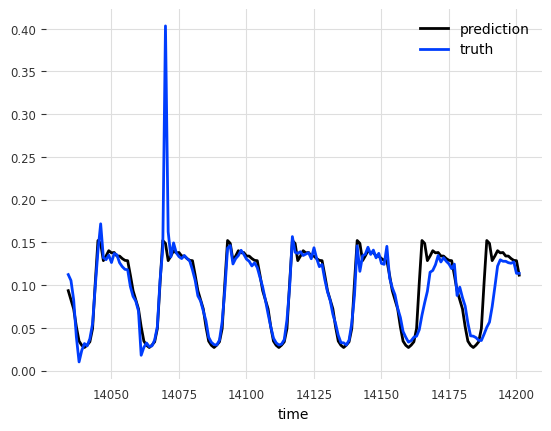

In [11]:
series = pipeline.data['train'].append(pipeline.data['valid'])

model = ExponentialSmoothing(
    trend=ModelMode.NONE,
    seasonal_periods=24,
    seasonal=SeasonalityMode.MULTIPLICATIVE,
    smoothing_level=0.9958404863116908
)

model.fit(series[-500:])

preds = model.predict(n=24*7)
preds.plot(label='prediction')

pipeline.data['test'][:24*7].plot(label='truth')

In [ ]:
# evaluate with full backtest on test data

model.backtest(
    series=series.append(pipeline.data['test']),
    start=len(series),
    train_length=500,
    forecast_horizon=24*7
)